In [21]:
import numpy as np
import cv2
import pywt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [22]:
img = cv2.imread('lionel messi14.png')
img.shape

(374, 374, 3)

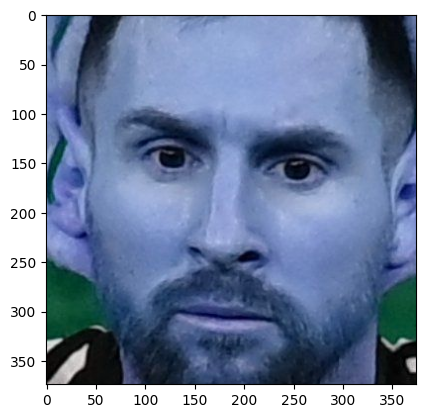

In [23]:
plt.imshow(img)

it's a colorful image in rgb. though it's showing in just blue

In [24]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(374, 374)

In [25]:
gray

array([[149, 147, 146, ..., 131, 136, 140],
       [148, 146, 145, ..., 132, 135, 139],
       [147, 145, 143, ..., 133, 134, 139],
       ...,
       [ 10,  35,  79, ...,  11,  13,  15],
       [ 39,  78, 122, ...,  13,  12,  13],
       [ 71, 117, 153, ...,  14,  13,  15]], dtype=uint8)

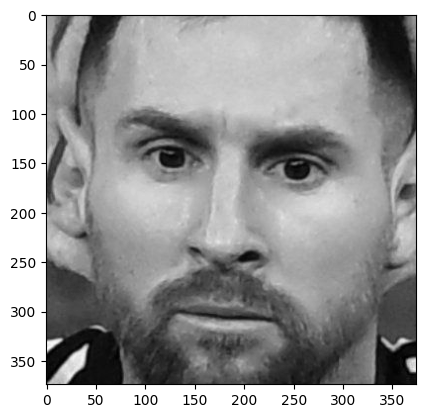

In [26]:
plt.imshow(gray, cmap='gray')

In [28]:
face_cascade = cv2.CascadeClassifier("haarcascades\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascades\haarcascade_eye.xml")

In [29]:
faces = face_cascade.detectMultiScale(gray, 1.1, 5)
faces

array([[ 25,  25, 320, 320]])

In [30]:
eyes = eye_cascade.detectMultiScale(gray, 1.1, 5)
eyes

array([[ 86, 107,  72,  72],
       [209, 112,  84,  84]])

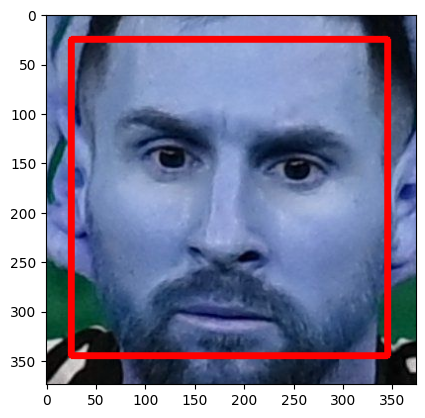

In [31]:
for (x, y, w, h) in faces:
    img_detected_face = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 5)
    plt.imshow(img_detected_face)

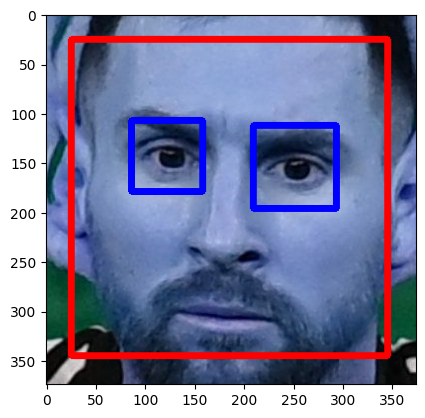

In [32]:
for (x, y, w, h) in eyes:
    img_detected_eyes = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 5)
    plt.imshow(img_detected_eyes)

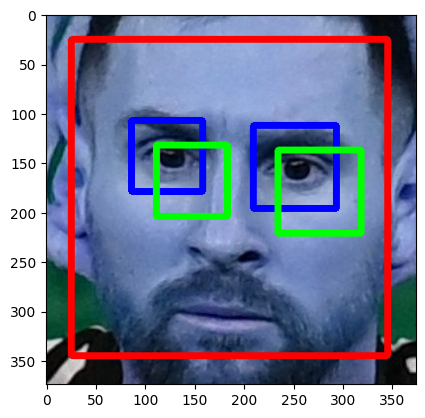

In [33]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 5)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),5)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

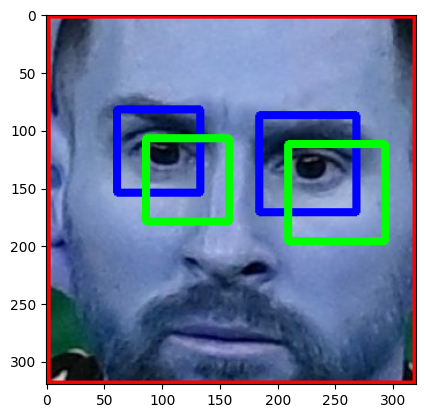

In [34]:
plt.imshow(roi_color, cmap='gray')

In [35]:
def get_cropped_image_for_2_eyes(image_path):
    img_main = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img_main, cv2.COLOR_BGR2GRAY)
    faces_gray = face_cascade.detectMultiScale(gray_img, 1.1, 5)
    for (x,y,w,h) in faces_gray:
        roi_color = img_main[y:y+h, x:x+w]
        eyes_gray = eye_cascade.detectMultiScale(gray_img, 1.1, 5)
        if len(eyes_gray) >=2:
            return roi_color


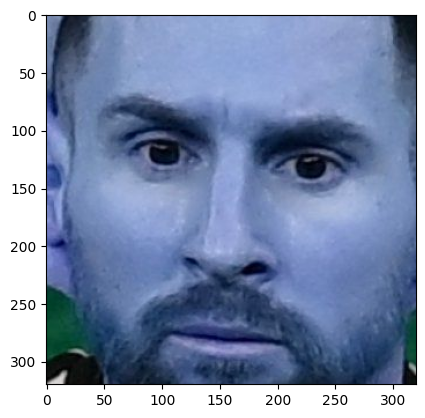

In [37]:
cropped_img = get_cropped_image_for_2_eyes('lionel messi14.png')
plt.imshow(cropped_img, cmap='gray')

In [38]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

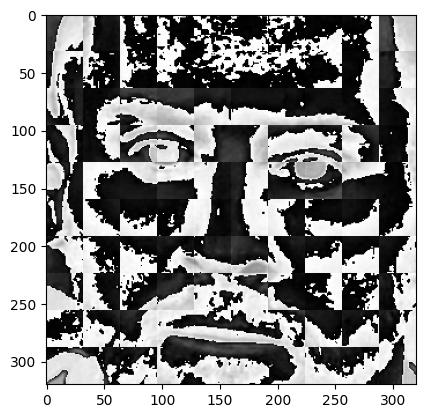

In [41]:
im_haar = w2d(cropped_img, 'db1', 5)
plt.imshow(im_haar, cmap='gray')